In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("us-national-population-1900-2017-by-year.tsv", sep="\t")

In [3]:
df.head()

,Date,Value
0,"Oct 1, 2017",325.99 million
1,"Jul 1, 2017",325.34 million
2,"Jul 1, 2016",323.13 million
3,"Jul 1, 2015",320.90 million
4,"Jul 1, 2014",318.56 million


In [4]:
df.Value = df.Value.str.replace(" million","")

In [5]:
df.head()

,Date,Value
0,"Oct 1, 2017",325.99
1,"Jul 1, 2017",325.34
2,"Jul 1, 2016",323.13
3,"Jul 1, 2015",320.90
4,"Jul 1, 2014",318.56


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
Date     119 non-null object
Value    119 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [68]:
month2number = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}
def monthNumber(month):
    return month2number[month]
    
def formatDate(date):
    MonthDay, Year = date.split(",")
    Month, Day = MonthDay.split(" ")
    #print("Year: {} Month: {} Day: {}".format(Year, Month, Day))
    return "{0:04d}-{1:02d}-{2:02d}".format(int(Year), monthNumber(Month), int(Day))

def getYear(date):
    year, month, day = date.split("-")
    return year

In [42]:
date = "Oct 1, 2017"
formatDate(date)

'2017-10-01'

In [43]:
month = "Oct"
monthNumber(month)

10

In [44]:
date = "Oct 1, 2017"
foo = formatDate(date)

In [45]:
foo

'2017-10-01'

In [50]:
bar = [formatDate(date) for date in df.Date]

In [51]:
bar

['2017-10-01',
 '2017-07-01',
 '2016-07-01',
 '2015-07-01',
 '2014-07-01',
 '2013-07-01',
 '2012-07-01',
 '2011-07-01',
 '2010-07-01',
 '2009-07-01',
 '2008-07-01',
 '2007-07-01',
 '2006-07-01',
 '2005-07-01',
 '2004-07-01',
 '2003-07-01',
 '2002-07-01',
 '2001-07-01',
 '2000-07-01',
 '1999-07-01',
 '1998-07-01',
 '1997-07-01',
 '1996-07-01',
 '1995-07-01',
 '1994-07-01',
 '1993-07-01',
 '1992-07-01',
 '1991-07-01',
 '1990-07-01',
 '1989-07-01',
 '1988-07-01',
 '1987-07-01',
 '1986-07-01',
 '1985-07-01',
 '1984-07-01',
 '1983-07-01',
 '1982-07-01',
 '1981-07-01',
 '1980-07-01',
 '1979-07-01',
 '1978-07-01',
 '1977-07-01',
 '1976-07-01',
 '1975-07-01',
 '1974-07-01',
 '1973-07-01',
 '1972-07-01',
 '1971-07-01',
 '1970-07-01',
 '1969-07-01',
 '1968-07-01',
 '1967-07-01',
 '1966-07-01',
 '1965-07-01',
 '1964-07-01',
 '1963-07-01',
 '1962-07-01',
 '1961-07-01',
 '1960-07-01',
 '1959-07-01',
 '1958-07-01',
 '1957-07-01',
 '1956-07-01',
 '1955-07-01',
 '1954-07-01',
 '1953-07-01',
 '1952-07-

In [52]:
df.Date = bar

In [53]:
df.head()

,Date,Value
0,2017-10-01,325.99
1,2017-07-01,325.34
2,2016-07-01,323.13
3,2015-07-01,320.90
4,2014-07-01,318.56


In [69]:
date = '2017-10-01'
year = getYear(date)
print(year)

2017


In [70]:
df['Year'] = [getYear(date) for date in df.Date]

In [71]:
df.head()

,Date,Value,Year
0,2017-10-01,325.99,2017
1,2017-07-01,325.34,2017
2,2016-07-01,323.13,2016
3,2015-07-01,320.90,2015
4,2014-07-01,318.56,2014


In [131]:
beginYear = "2000"
endYear = "2016"
data = df[(df.Year >= beginYear) & (df.Year <= endYear)]

In [132]:
data.head()

,Date,Value,Year
2,2016-07-01,323.13,2016
3,2015-07-01,320.90,2015
4,2014-07-01,318.56,2014
5,2013-07-01,316.20,2013
6,2012-07-01,314.00,2012


In [133]:
import datetime as dt

x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.Date]
y = data.Value.values.astype('float')

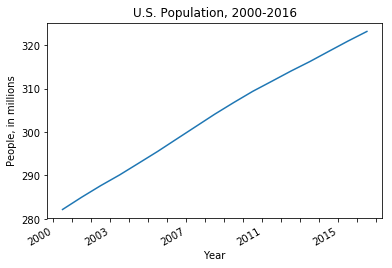

In [135]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x,y)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
minYear = min(data.Year)
maxYear = max(data.Year)
plt.title("U.S. Population, {}-{}".format(minYear,maxYear))
plt.ylabel("People, in millions")
plt.xlabel("Year")

n=int(len(data.Year)/4)
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    #print("index:",index,"label:",label)
    if index == 1:
        label.set_visible(True)
    elif index % n == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()